In [65]:
import pandas as pd 
import numpy as np
df=pd.read_excel(r"C:\Users\Hoi Chu\Desktop\DA\Lesson\Financial Sample.xlsx") 
df.head()


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


In [9]:
#Data Cleaning
df.info()
# file du lieu khong bi missing 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9    Sales               700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [5]:
df.isnull()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
missing_values = df.isnull().sum()
print(missing_values)

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
 Sales                 0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64


In [15]:
#duplicate values.
df.duplicated()
counts = duplicates.value_counts()
print(counts)

False    700
dtype: int64


In [23]:
#inconsistent values/Data conversion
df["Year"] = df["Year"].astype(object)
print(df["Year"].dtype)

object


In [12]:
#Normalize the data: 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
# from pylab import rsParams
import seaborn as sb
# import spicy
# from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [66]:
df1 = df.filter(['Units Sold','Manufacturing Price','Sale Price','Gross Sales','Discounts','Sales','COGS','Profit','Month Number'])
df1

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,COGS,Profit,Month Number
0,1618.5,3,20,32370.0,0.00,16185.0,16185.00,1
1,1321.0,3,20,26420.0,0.00,13210.0,13210.00,1
2,2178.0,3,15,32670.0,0.00,21780.0,10890.00,6
3,888.0,3,15,13320.0,0.00,8880.0,4440.00,6
4,2470.0,3,15,37050.0,0.00,24700.0,12350.00,6
...,...,...,...,...,...,...,...,...
695,2475.0,260,300,742500.0,111375.00,618750.0,12375.00,3
696,546.0,260,300,163800.0,24570.00,136500.0,2730.00,10
697,1368.0,5,7,9576.0,1436.40,6840.0,1299.60,2
698,723.0,10,7,5061.0,759.15,3615.0,686.85,4


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
df1_train, df1_test = train_test_split(df1, random_state = 40)

In [33]:
df1_train.head()

,Units Sold,Manufacturing Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number
2,2178.0,3,32670.0,0.00,32670.00,21780.0,10890.00,6
188,4251.0,10,29757.0,1190.28,28566.72,21255.0,7311.72,1
177,2031.0,10,30465.0,1218.60,29246.40,20310.0,8936.40,10
455,386.0,3,4632.0,463.20,4168.80,1158.0,3010.80,10
525,1808.0,120,12656.0,1392.16,11263.84,9040.0,2223.84,11


In [34]:
scaler = StandardScaler().fit(df1_train)
print (scaler)

StandardScaler()


In [36]:
scaler.mean_

array([1.58343048e+03, 9.78190476e+01, 1.65612905e+05, 1.15732128e+04,
       1.54039692e+05, 1.31458346e+05, 2.25813463e+04, 7.91619048e+00])

In [37]:
scaler.scale_

array([8.61250358e+02, 1.08840537e+02, 2.40625658e+05, 2.12380990e+04,
       2.24477808e+05, 1.93787318e+05, 4.01624914e+04, 3.38352096e+00])

In [39]:
scaler.transform(df1_train)

array([[ 6.90356200e-01, -8.71174015e-01, -5.52488482e-01, ...,
        -5.65972773e-01, -2.91101121e-01, -5.66330311e-01],
       [ 3.09732182e+00, -8.06859742e-01, -5.64594423e-01, ...,
        -5.68681929e-01, -3.80196192e-01, -2.04408088e+00],
       [ 5.19674122e-01, -8.06859742e-01, -5.61652093e-01, ...,
        -5.73558409e-01, -3.39743522e-01,  6.15870140e-01],
       ...,
       [ 1.08513107e+00, -8.52798509e-01, -5.62686896e-01, ...,
        -6.39383150e-01,  2.00818551e-03, -5.66330311e-01],
       [ 1.28367961e+00,  1.39820104e+00, -6.10034299e-01, ...,
        -6.08983844e-01, -4.51777159e-01,  6.15870140e-01],
       [ 2.06176430e-01, -8.71174015e-01,  1.87318800e+00, ...,
         1.68432928e+00,  2.30972110e+00, -1.45298065e+00]])

In [40]:
df1_train_scaled = scaler.transform(df1_train)
print(df1_train_scaled)

[[ 6.90356200e-01 -8.71174015e-01 -5.52488482e-01 ... -5.65972773e-01
  -2.91101121e-01 -5.66330311e-01]
 [ 3.09732182e+00 -8.06859742e-01 -5.64594423e-01 ... -5.68681929e-01
  -3.80196192e-01 -2.04408088e+00]
 [ 5.19674122e-01 -8.06859742e-01 -5.61652093e-01 ... -5.73558409e-01
  -3.39743522e-01  6.15870140e-01]
 ...
 [ 1.08513107e+00 -8.52798509e-01 -5.62686896e-01 ... -6.39383150e-01
   2.00818551e-03 -5.66330311e-01]
 [ 1.28367961e+00  1.39820104e+00 -6.10034299e-01 ... -6.08983844e-01
  -4.51777159e-01  6.15870140e-01]
 [ 2.06176430e-01 -8.71174015e-01  1.87318800e+00 ...  1.68432928e+00
   2.30972110e+00 -1.45298065e+00]]


In [41]:
print(df1_train_scaled.mean(axis=0))

[ 4.22942105e-17 -6.76707367e-17  6.76707367e-18  3.38353684e-18
  4.39859789e-17  3.38353684e-17  0.00000000e+00  1.08273179e-16]


In [42]:
print(df1_train_scaled.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1.]


In [45]:
df1_test.head()

,Units Sold,Manufacturing Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number
221,1123.0,260,13476.0,673.80,12802.20,3369.0,9433.20,8
15,615.0,5,9225.0,0.00,9225.00,6150.0,3075.00,12
225,1563.0,3,31260.0,1563.00,29697.00,15630.0,14067.00,5
46,1953.0,260,23436.0,0.00,23436.00,5859.0,17577.00,4
252,555.0,120,8325.0,416.25,7908.75,5550.0,2358.75,1


In [44]:
scaler = StandardScaler().fit(df1_test)
scaler.mean_

array([1.68288571e+03, 9.24514286e+01, 2.34198991e+05, 1.78817802e+04,
       2.16317211e+05, 1.87525809e+05, 2.87914027e+04, 7.85142857e+00])

In [46]:
scaler.scale_

array([8.79061837e+02, 1.07472397e+02, 2.84600863e+05, 2.68914895e+04,
       2.64116455e+05, 2.25807091e+05, 4.93501326e+04, 3.34846416e+00])

In [47]:
scaler.transform(df1_test)

array([[-0.63691278,  1.55899166, -0.77555278, ..., -0.81554927,
        -0.39226243,  0.04437002],
       [-1.21480159, -0.8137106 , -0.79048949, ..., -0.80323345,
        -0.52110098,  1.23894754],
       [-0.13637916, -0.83232003, -0.71306527, ..., -0.76125071,
        -0.29836602, -0.85156311],
       ...,
       [ 0.34822839,  1.55899166, -0.73903849, ..., -0.80404388,
        -0.22551272,  0.3430144 ],
       [ 0.72590375, -0.8137106 , -0.72503993, ..., -0.79963303,
        -0.21092309,  0.94030316],
       [-0.29791501,  0.2563316 , -0.72304416, ..., -0.76753927,
        -0.33578031,  1.23894754]])

In [48]:
df1_test_scaled = scaler.transform(df1_test)

In [49]:
print(df1_test_scaled)

[[-0.63691278  1.55899166 -0.77555278 ... -0.81554927 -0.39226243
   0.04437002]
 [-1.21480159 -0.8137106  -0.79048949 ... -0.80323345 -0.52110098
   1.23894754]
 [-0.13637916 -0.83232003 -0.71306527 ... -0.76125071 -0.29836602
  -0.85156311]
 ...
 [ 0.34822839  1.55899166 -0.73903849 ... -0.80404388 -0.22551272
   0.3430144 ]
 [ 0.72590375 -0.8137106  -0.72503993 ... -0.79963303 -0.21092309
   0.94030316]
 [-0.29791501  0.2563316  -0.72304416 ... -0.76753927 -0.33578031
   1.23894754]]


In [50]:
print(df1_test_scaled.mean(axis=0))

[-8.12048841e-17  1.11656716e-16  1.01506105e-17  1.62409768e-16
  5.07530526e-18 -4.06024420e-17  1.92861600e-16 -3.04518315e-17]


In [51]:
print(df1_test_scaled.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1.]


In [52]:
!pip install seaborn


[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


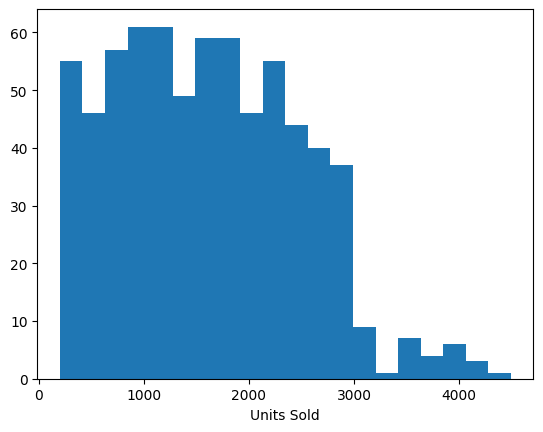

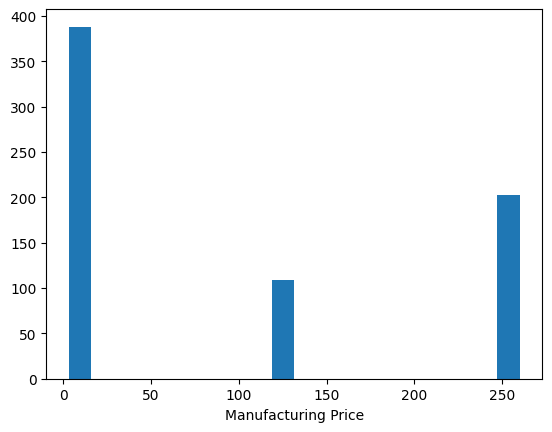

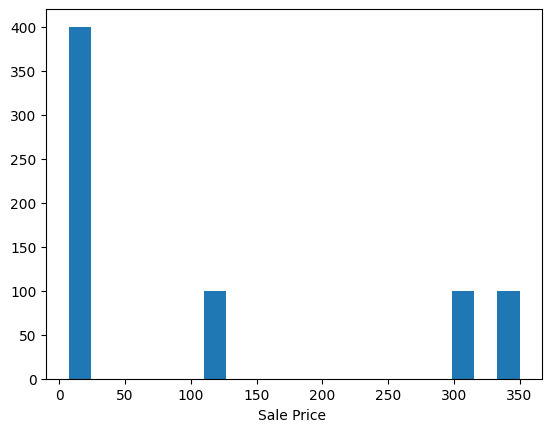

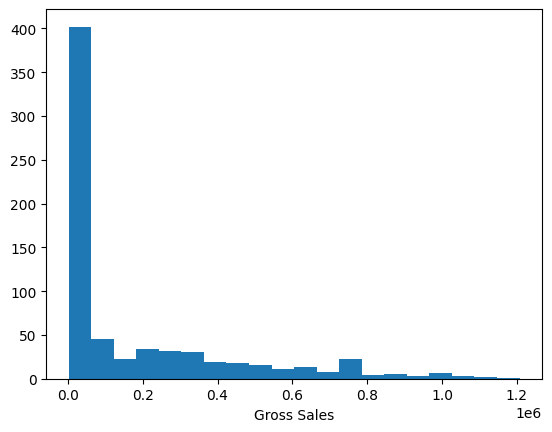

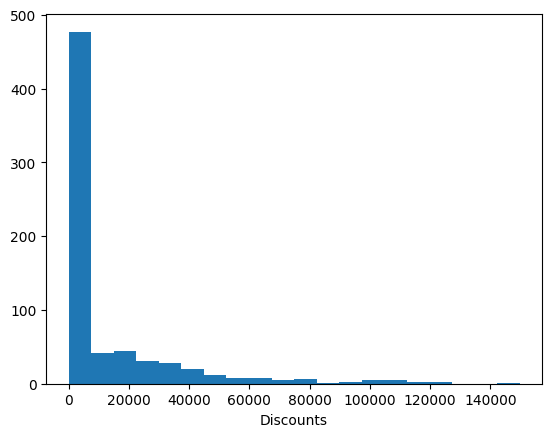

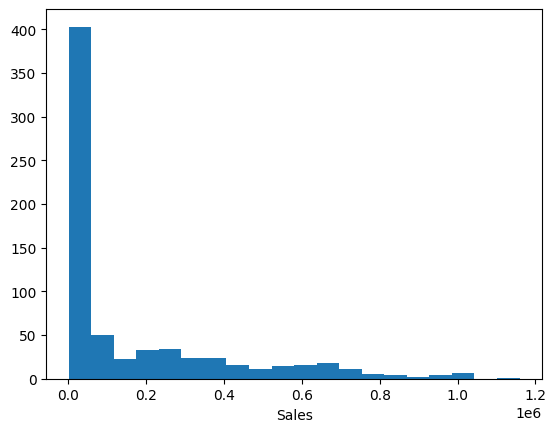

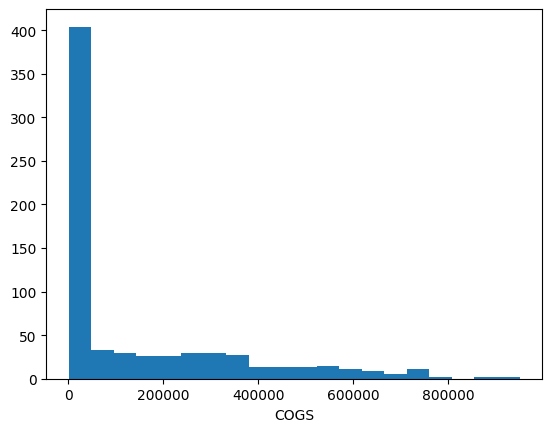

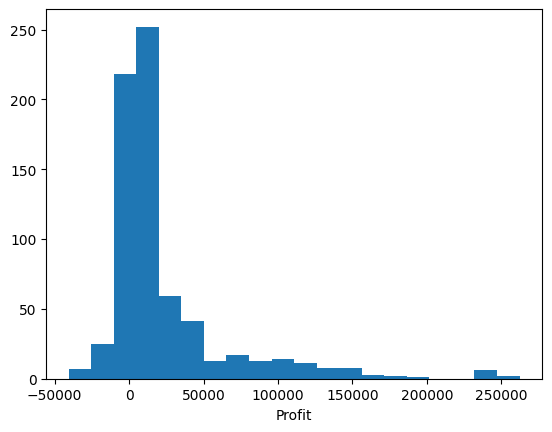

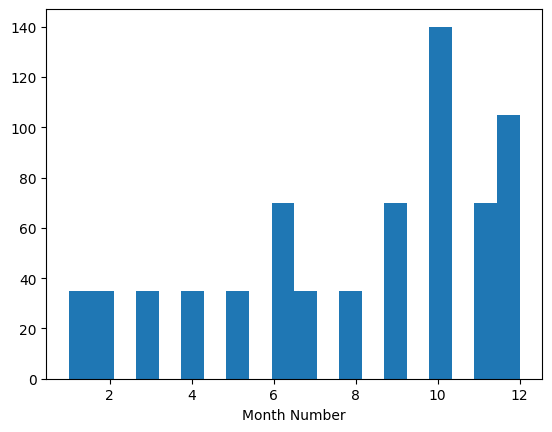

In [53]:
#Lưu tất cả những cột giá trị định lượng thành một list.
num_cols = df.select_dtypes(include = [int,float]).columns.to_list()
#Vẽ biểu đồ histogram cho những cột dữ liệu định lượng trong dataframe df
for col in num_cols:
    plt.hist(df[col],bins = 20)
    plt.xlabel(col)
    plt.show()


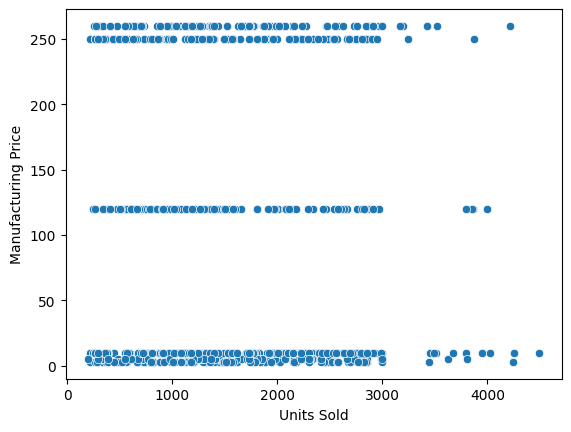

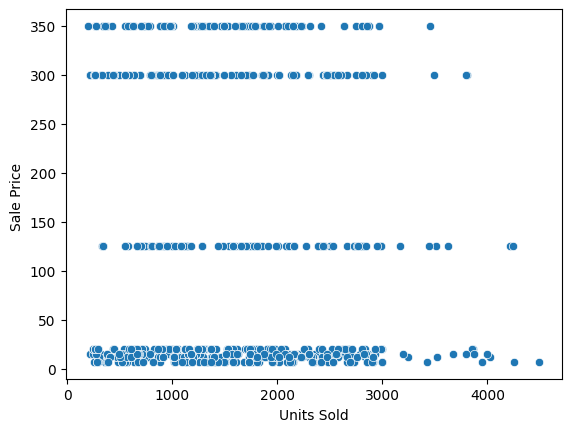

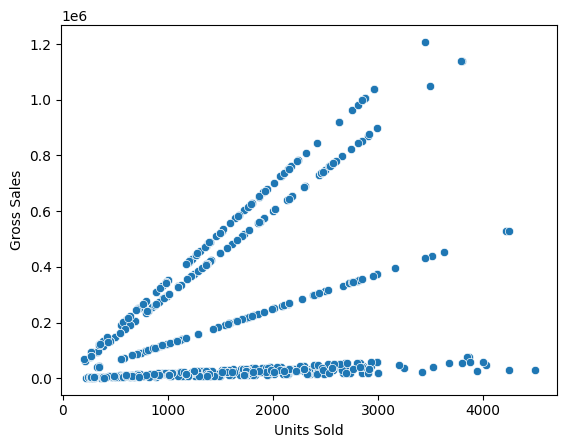

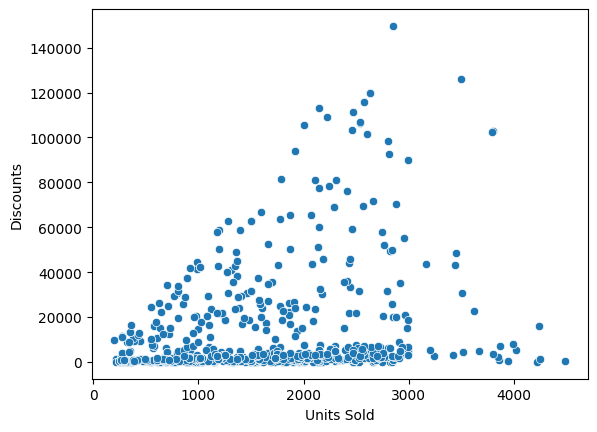

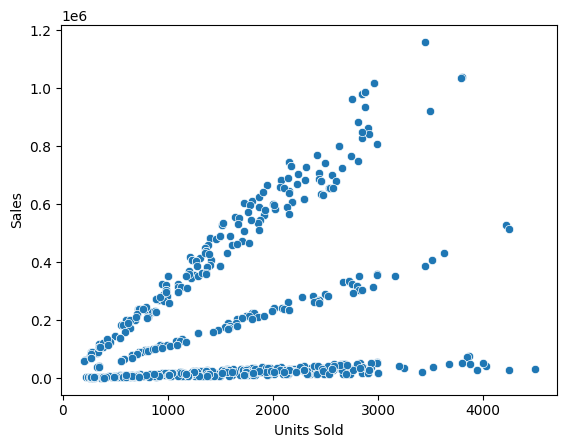

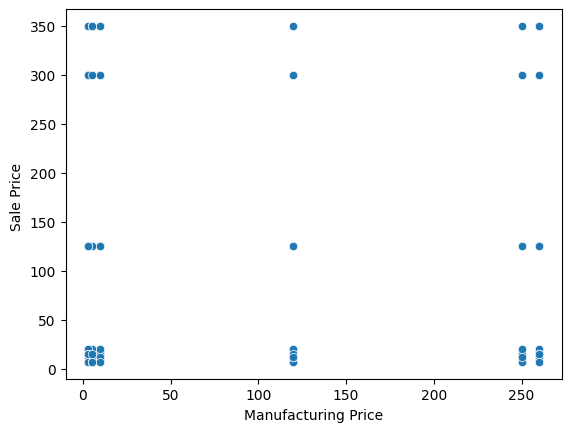

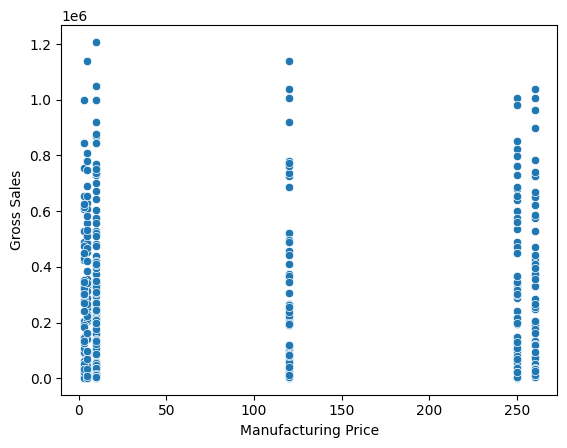

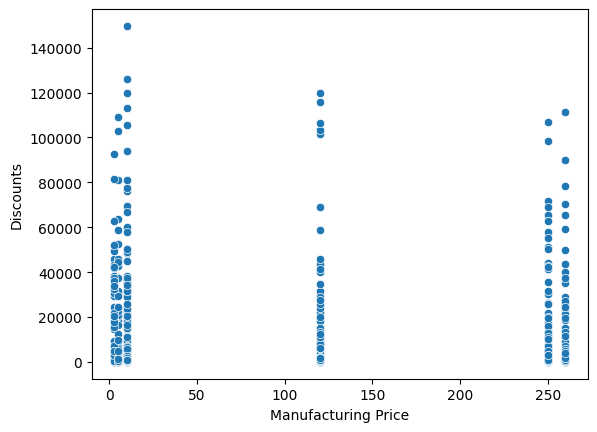

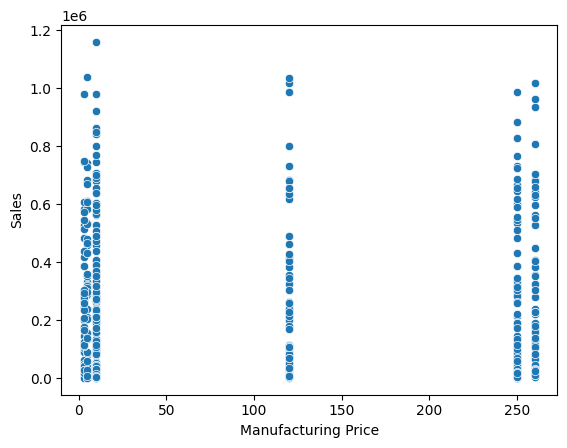

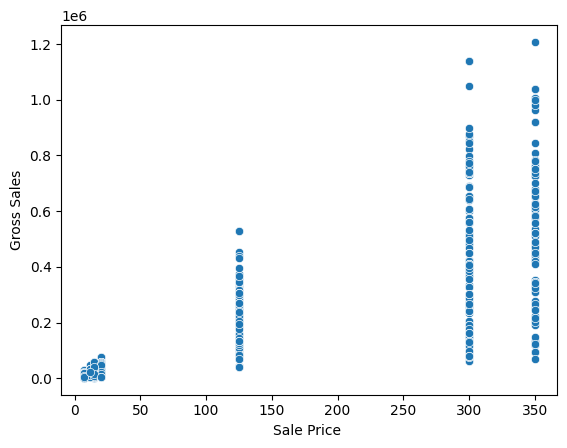

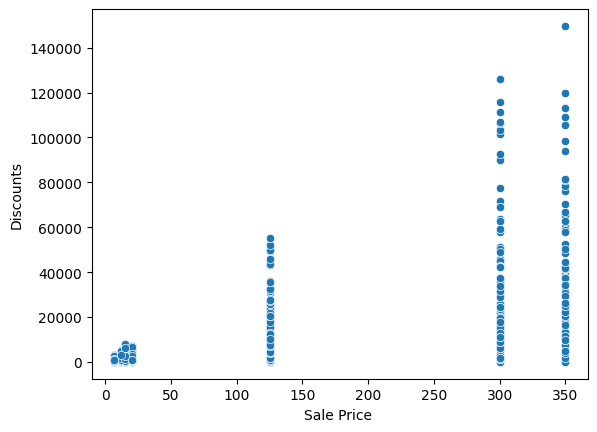

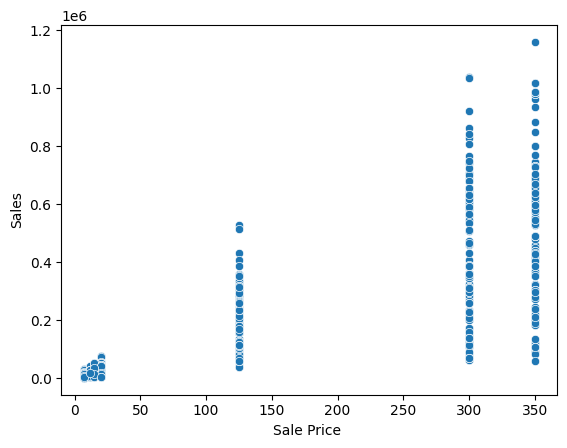

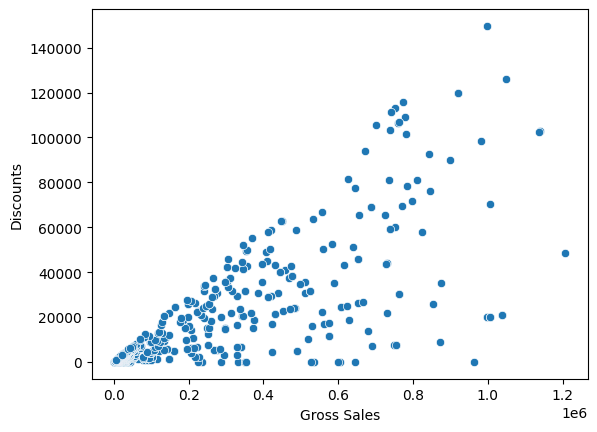

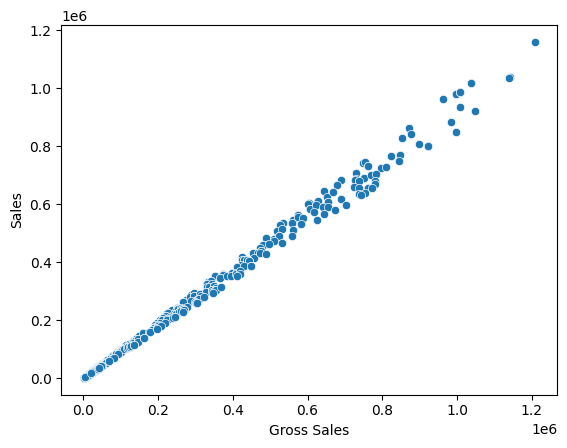

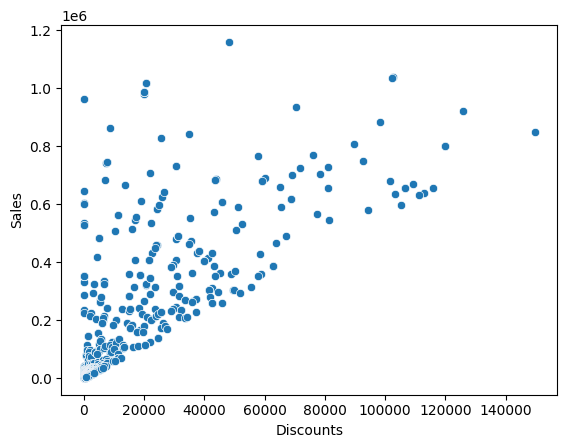

In [54]:
numerical_cols = [col for col in df.columns if df[col].dtype in [int,float]]

for i in range(len(num_cols)-1):
    for v in range(i+1,len(numerical_cols)):
        #Plot a scatterplot between two numerical columns
        sns.scatterplot(x=num_cols[i], y = num_cols[v], data = df)
        plt.show()
        

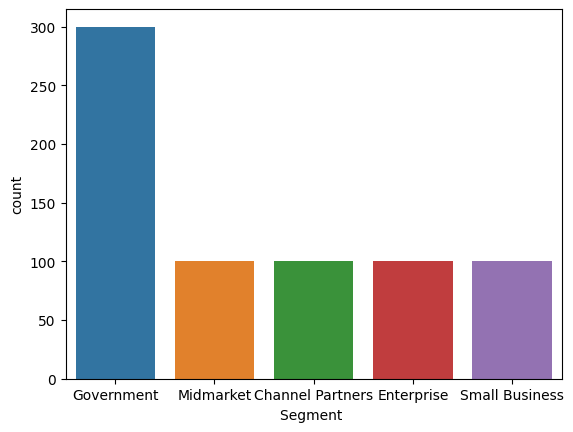

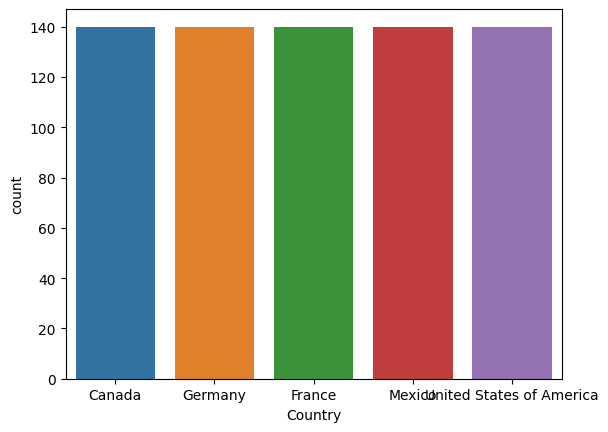

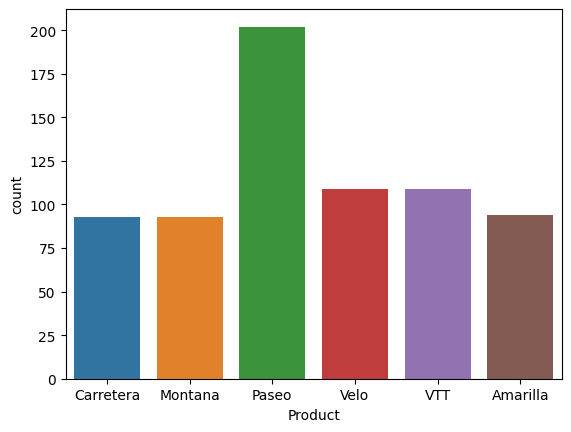

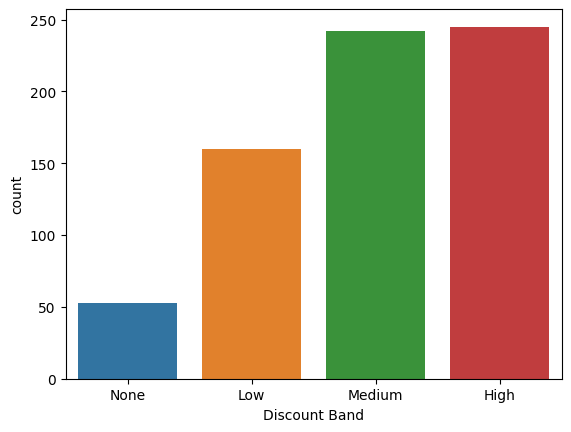

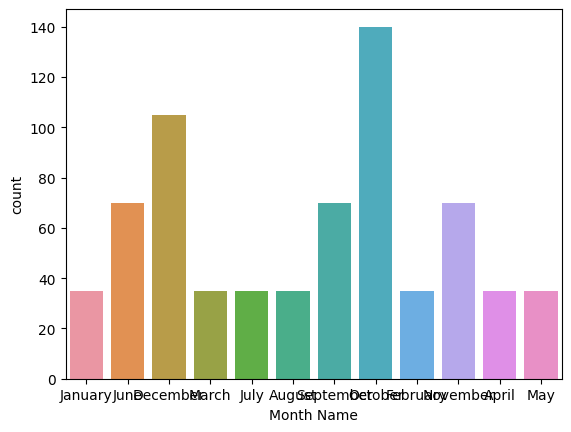

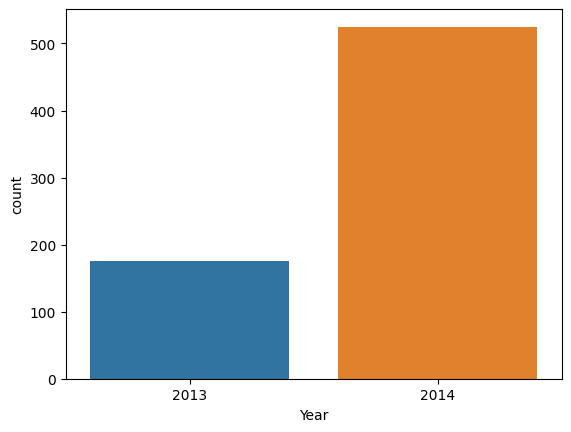

In [55]:
#Visualizing the count of catgorical columns:
categorical_cols = [col for col in df.columns if df[col].dtype == "O"]
#for i in categorical_cols:
#    df[i].value_counts().plot(kind = "bar", color = "r")
#    plt.show()
    
for i in categorical_cols:
    sns.countplot(x = i, data = df)
    plt.show()

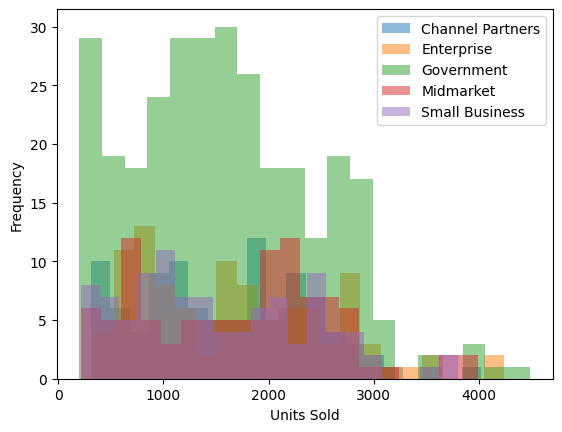

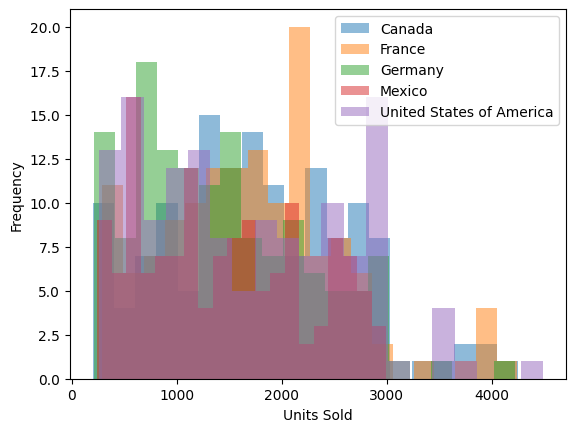

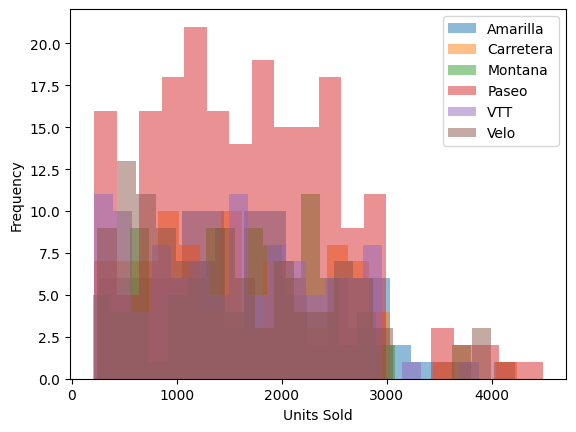

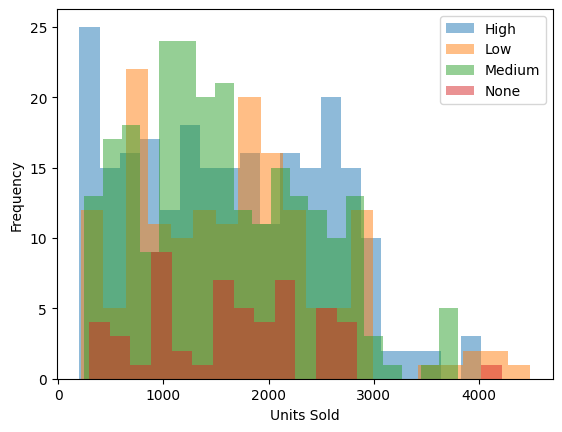

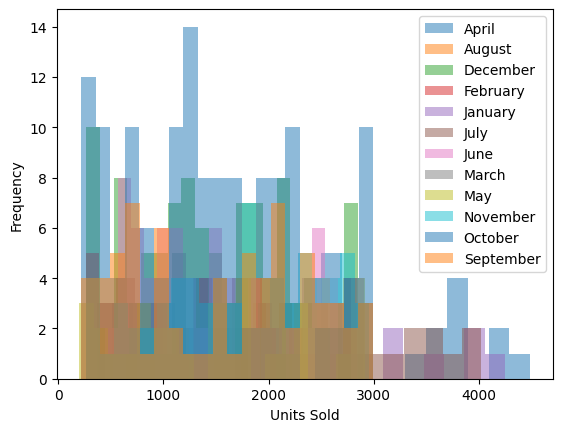

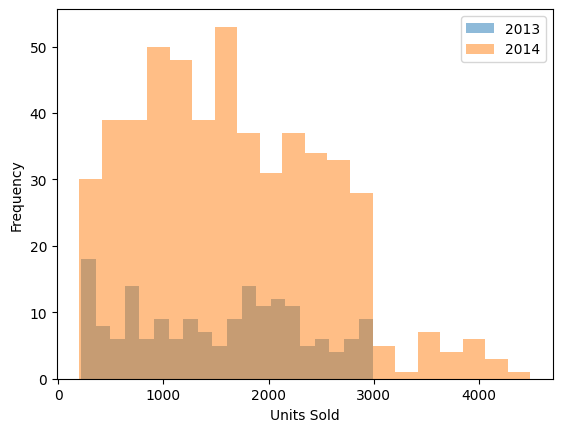

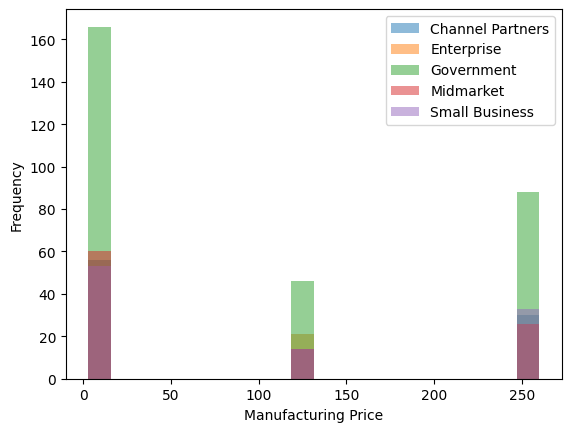

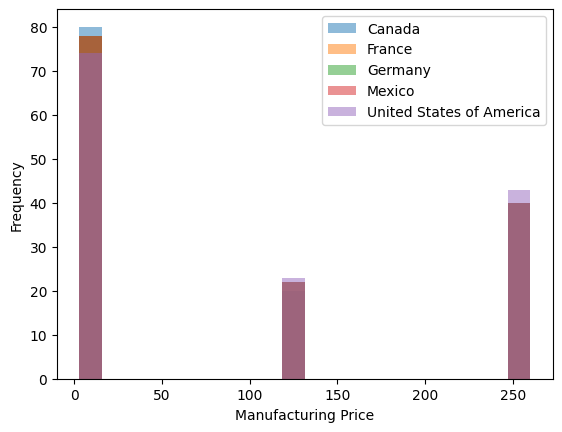

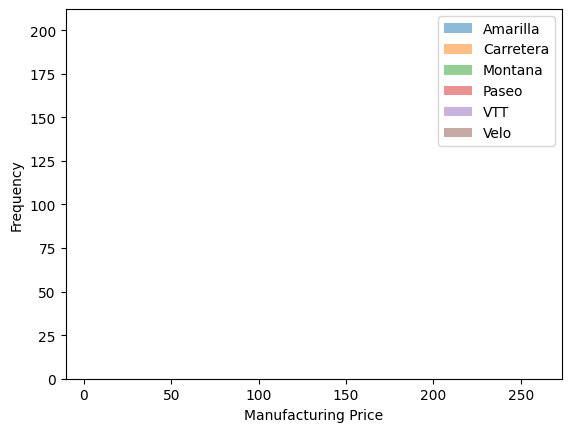

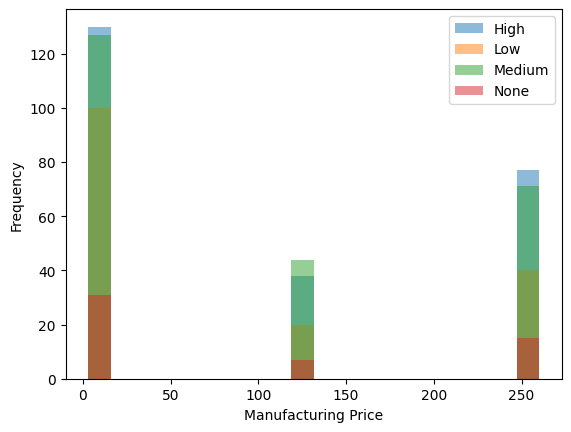

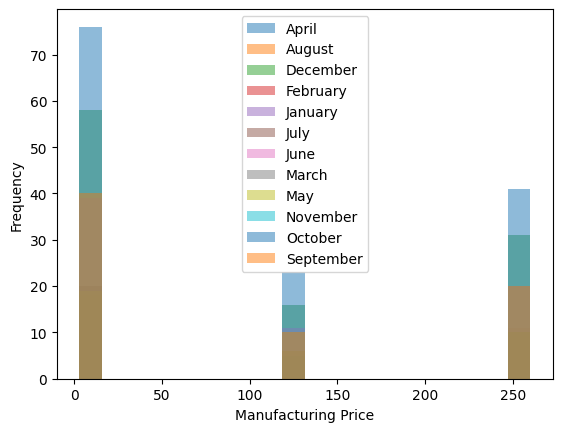

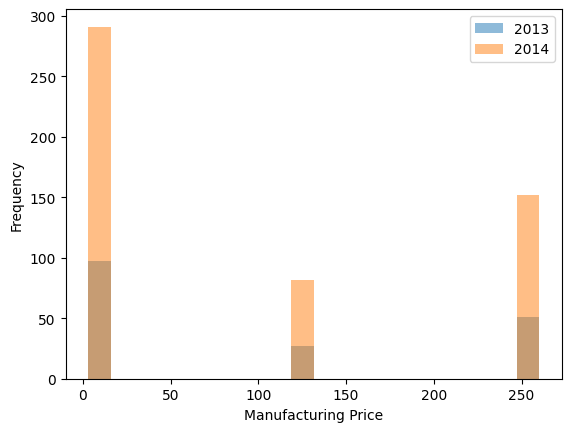

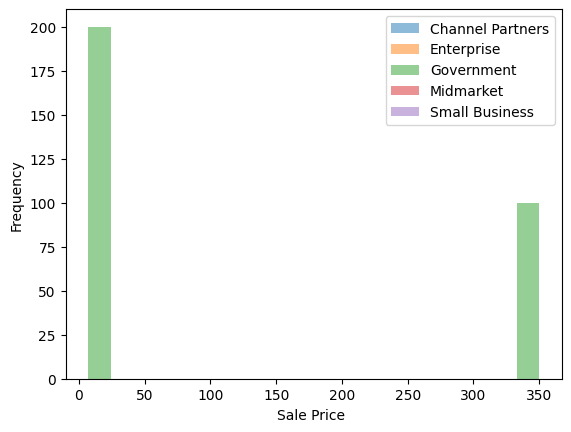

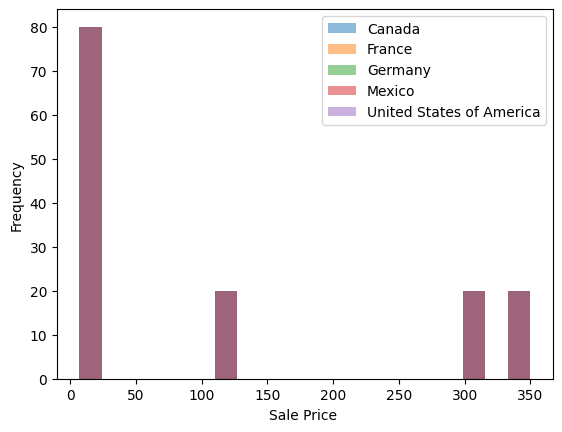

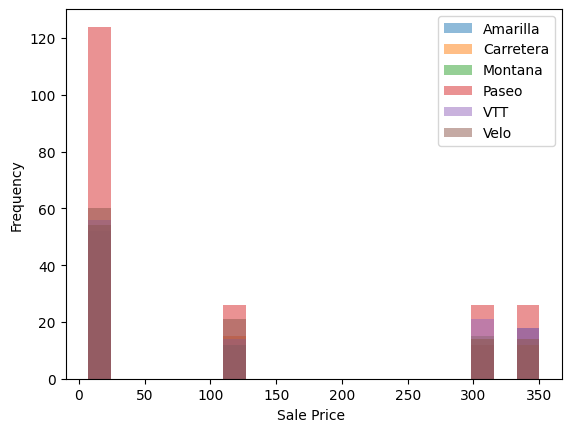

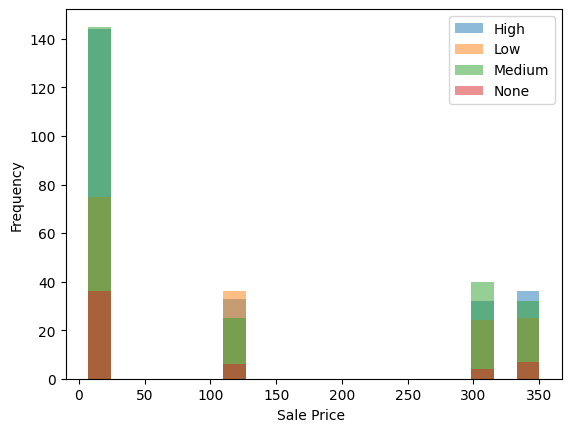

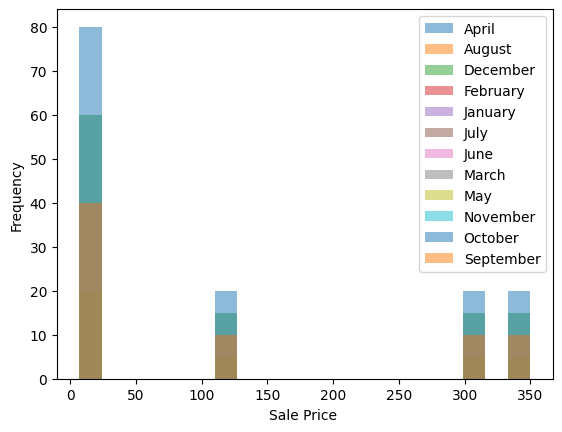

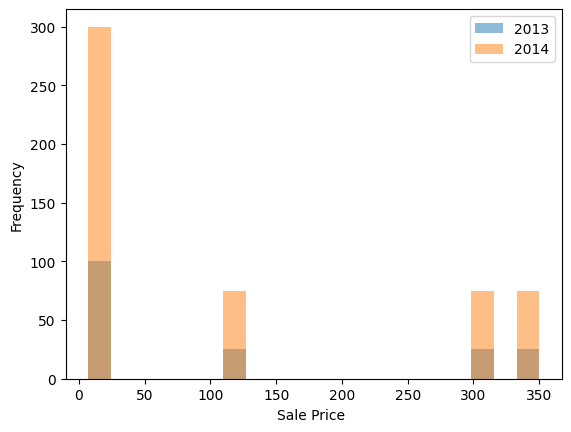

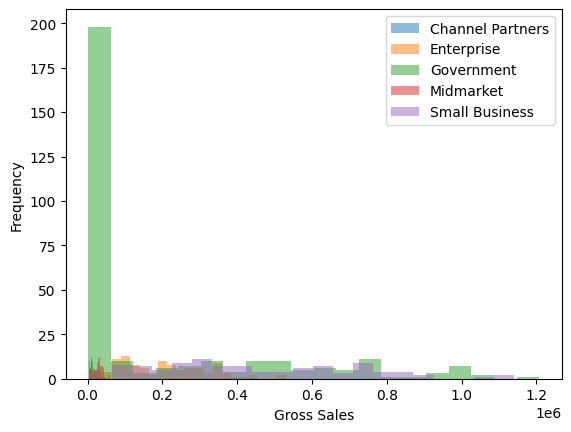

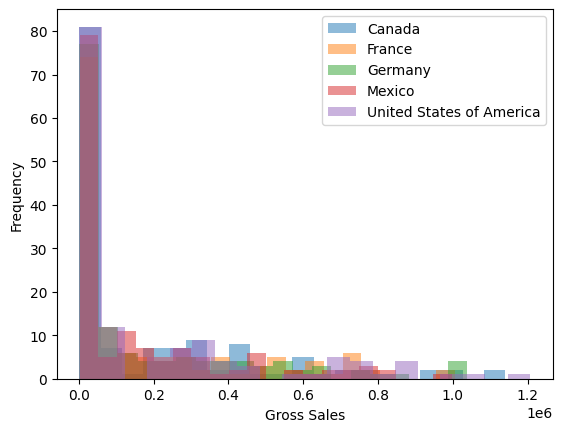

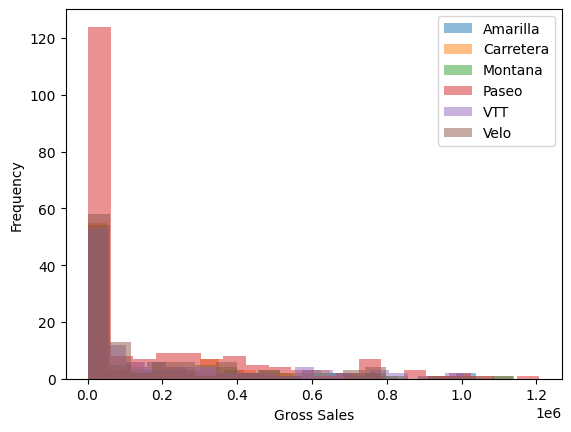

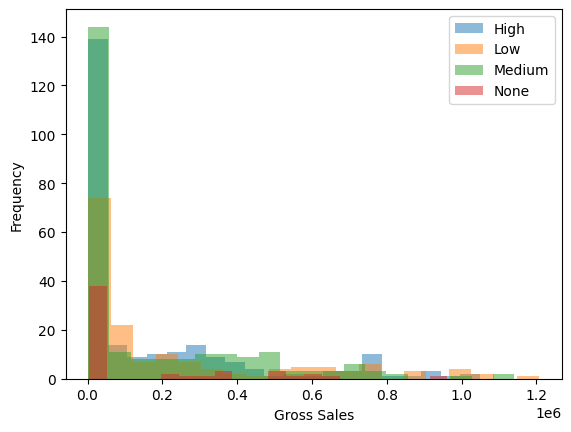

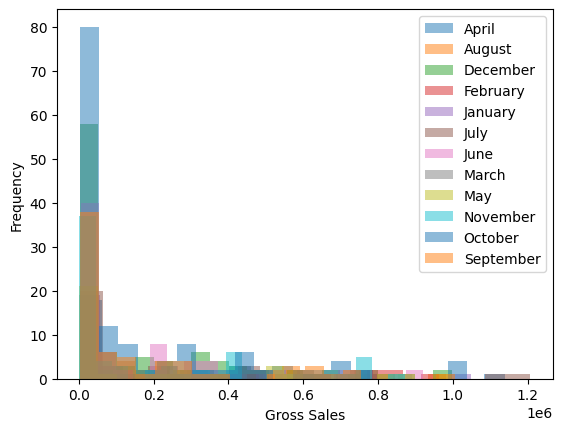

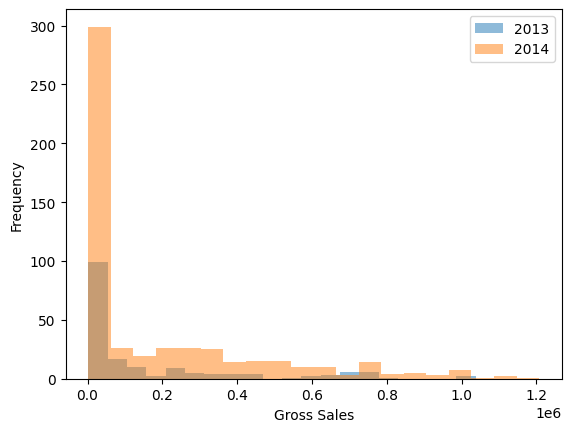

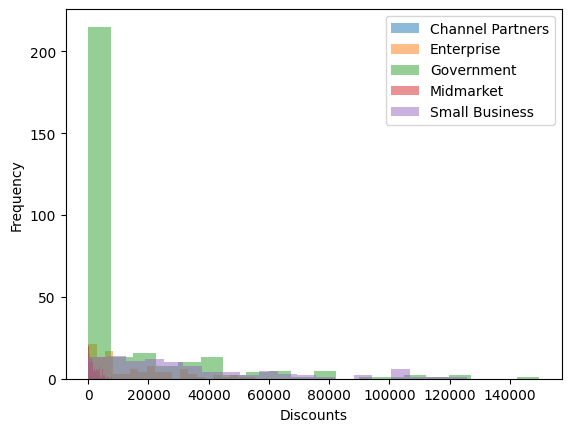

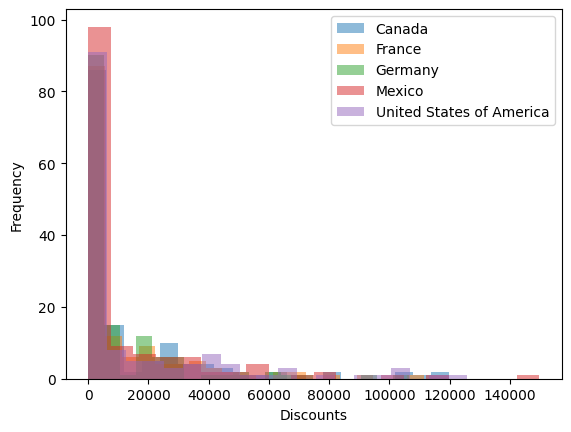

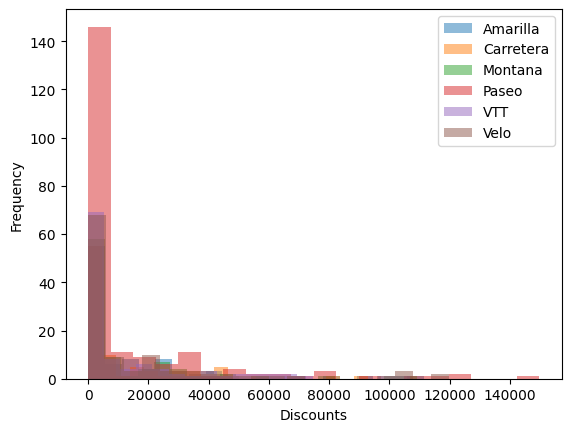

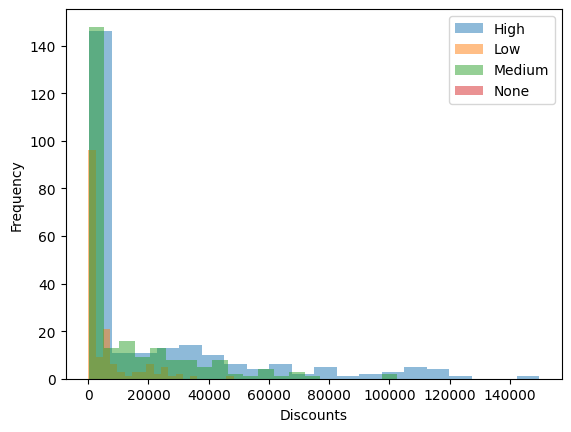

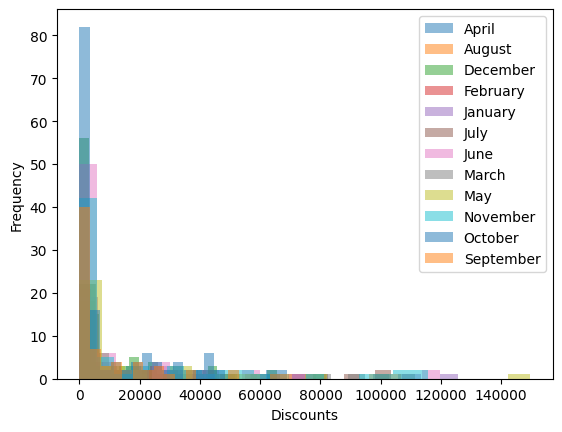

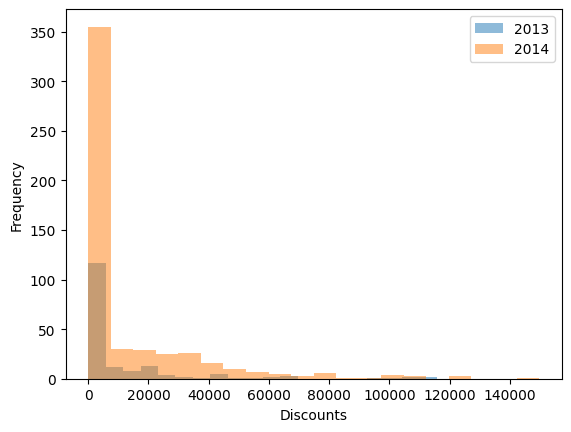

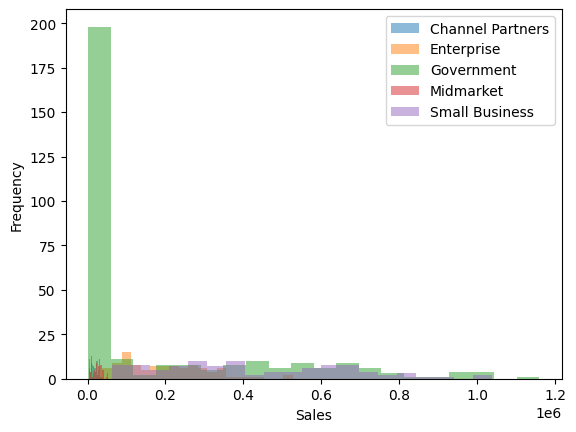

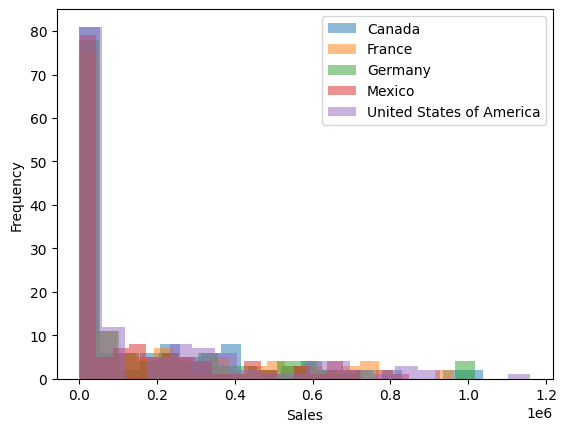

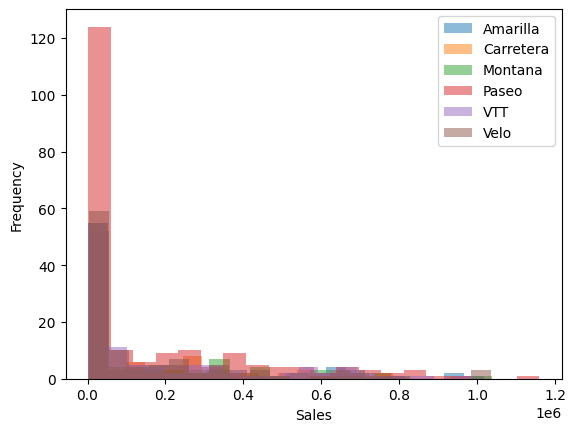

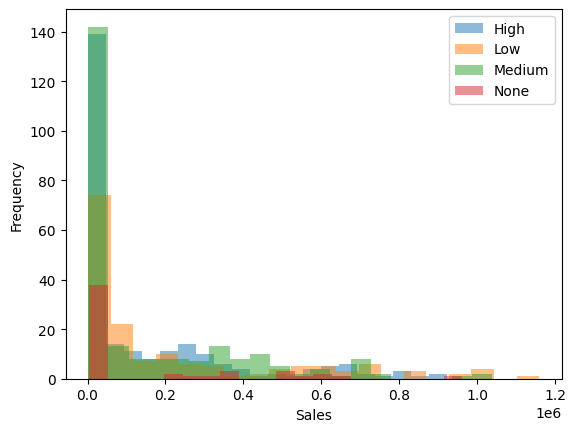

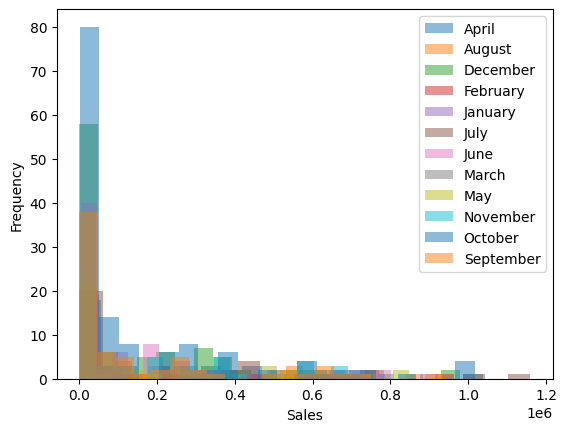

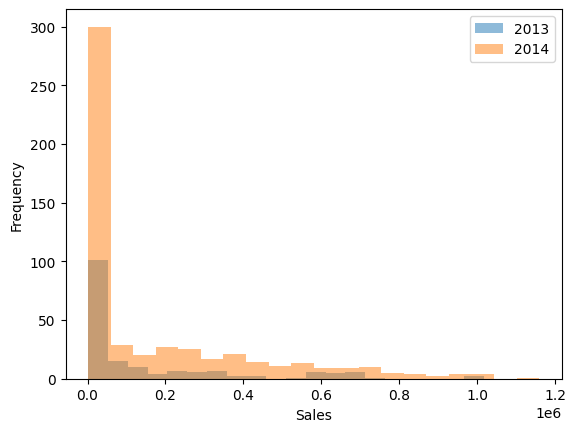

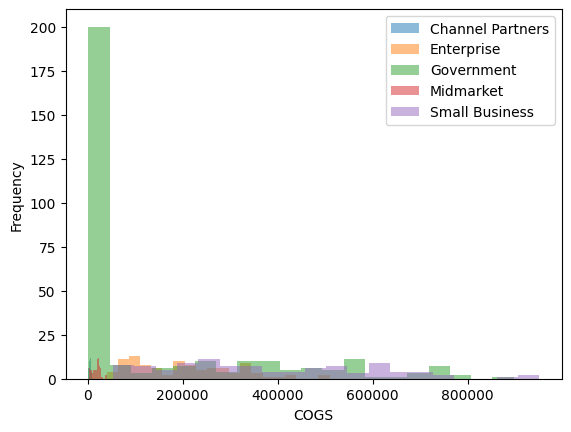

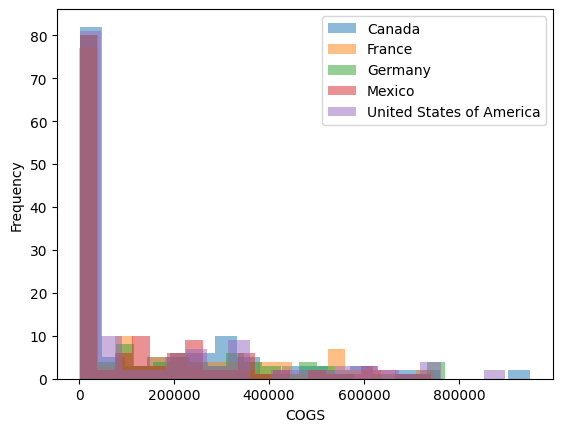

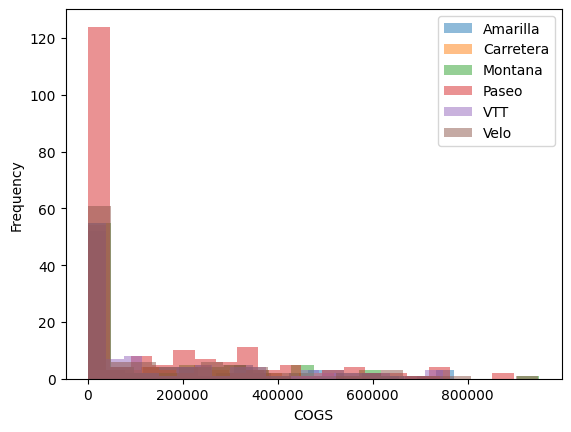

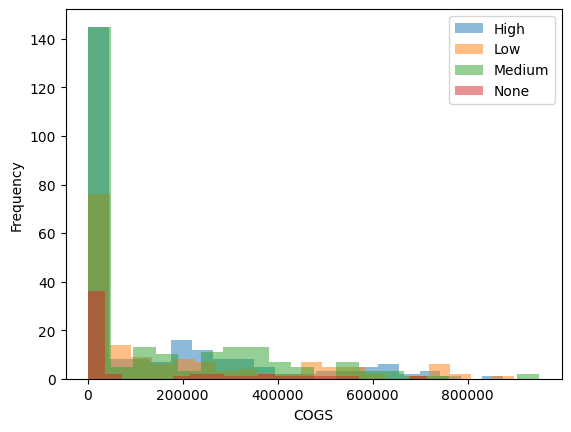

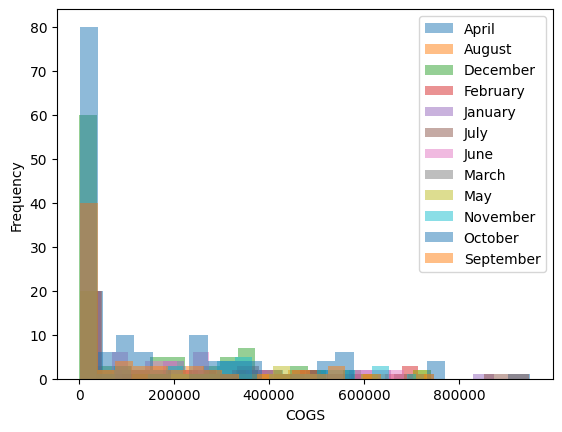

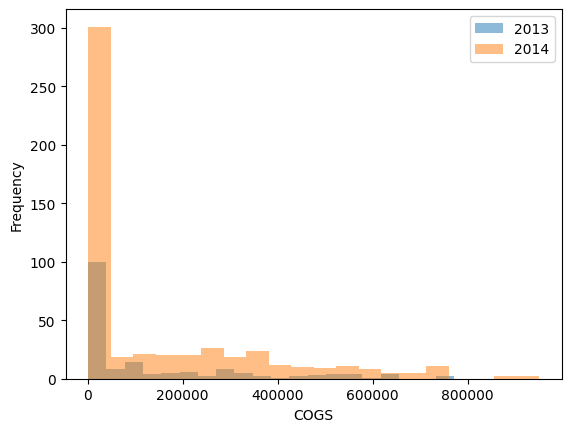

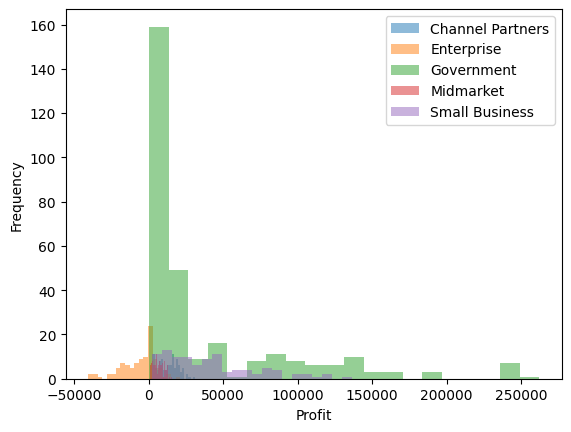

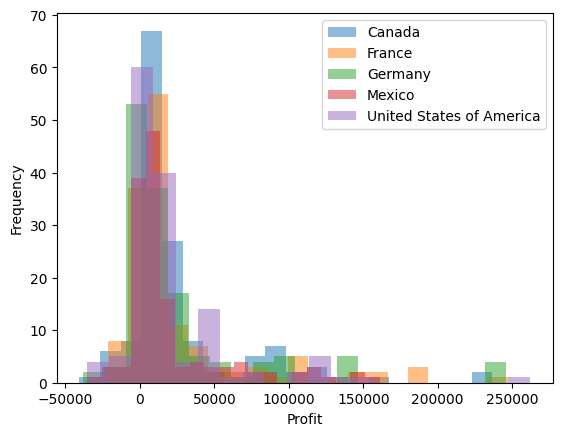

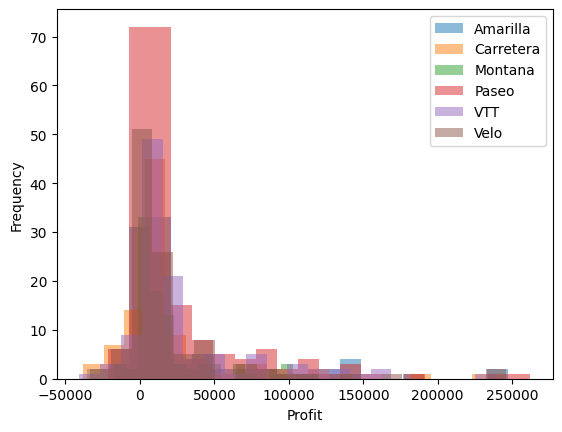

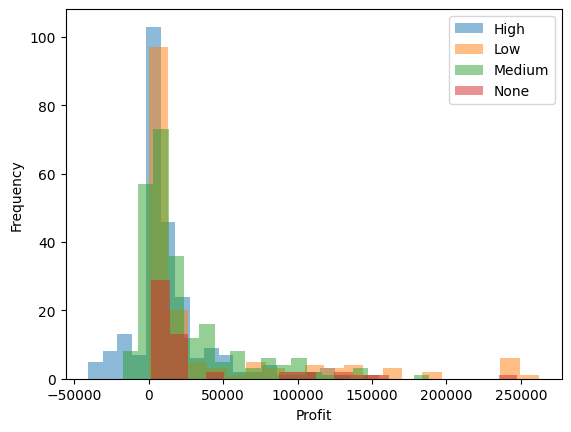

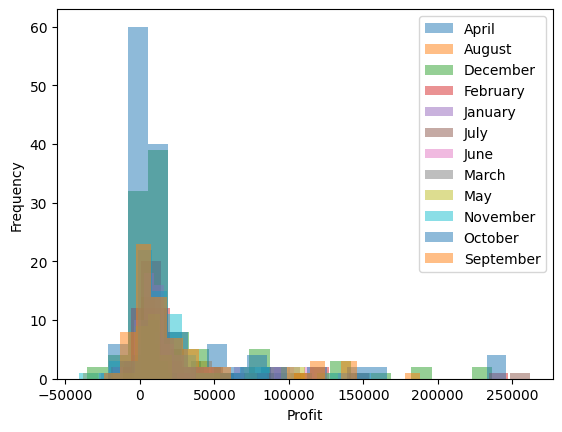

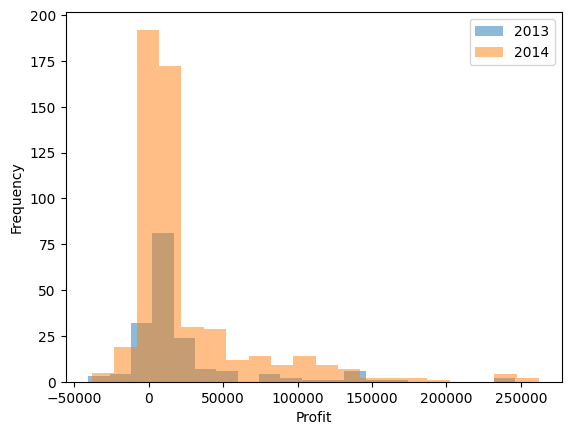

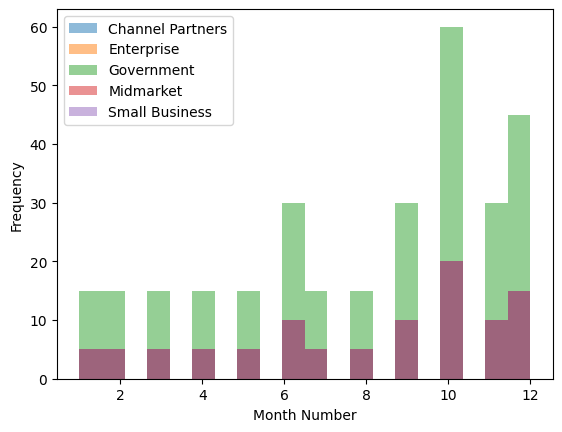

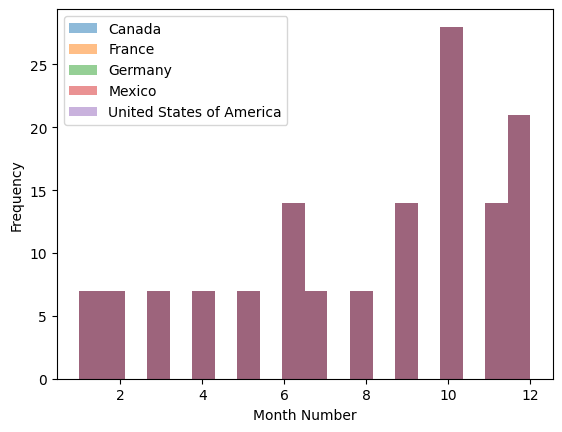

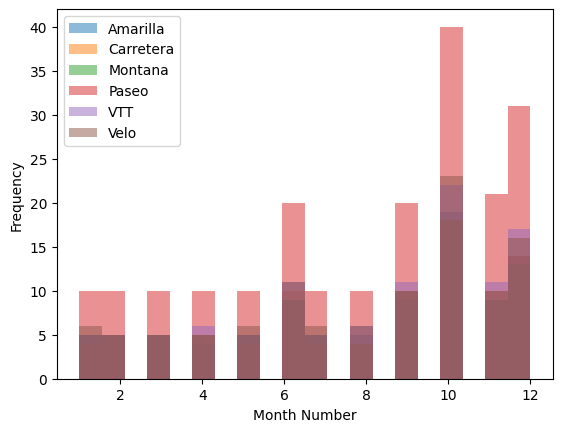

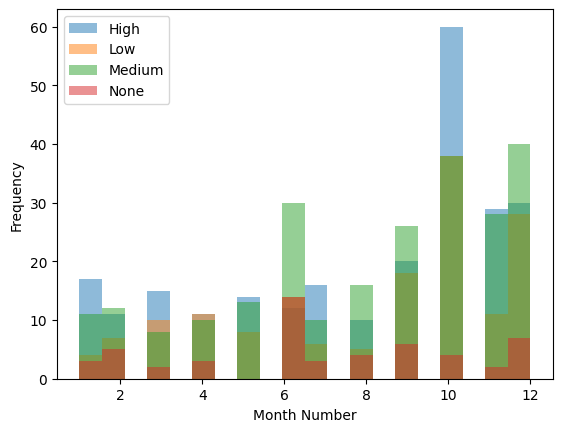

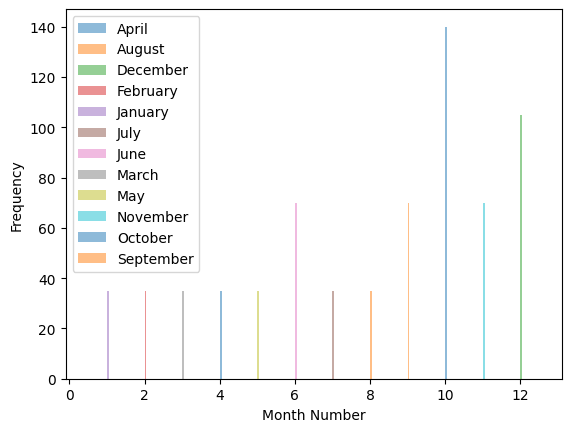

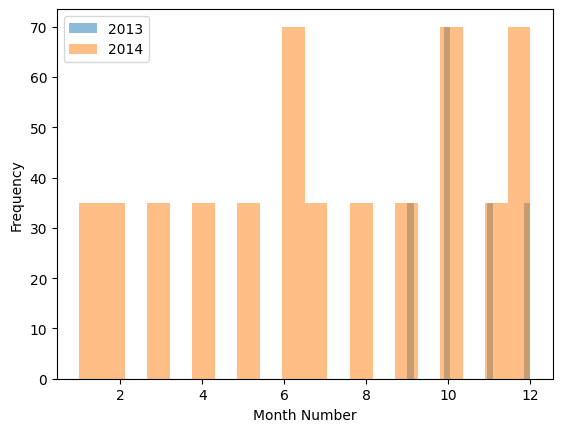

In [56]:
#Visualizing the distribution of numerical columns grouped by categorical column
for numeric in num_cols:
    for categorical in categorical_cols: 
        df.groupby(categorical)[numeric].plot(kind = "hist", alpha = 0.5, bins  = 20, legend = True)
        plt.xlabel(numeric)
        plt.show()

In [57]:
#Encoding categorical variable
from sklearn.preprocessing import LabelEncoder
#In ra những cột mang giá trị định tính
for i in df.select_dtypes(include = "object").columns:
    label_encoder = LabelEncoder()
    df[i] = label_encoder.fit_transform(list(df[i].values))

#Onehot Encoding
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df)
df

#Frequency Encoding
for i in df.select_dtypes(include = "object").columns:
    fe = df.groupby(i).size()/df.shape[0]
    df.loc[:,i + "_Freq_Encoded"] = df[i].map(fe)

df = pd.get_dummies(df)
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,2,0,1,3,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,4,1
1,2,2,1,3,1321.0,3,20,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,4,1
2,3,1,1,3,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,6,1
3,3,2,1,3,888.0,3,15,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,6,1
4,3,3,1,3,2470.0,3,15,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,4,1,0,0,2475.0,260,300,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,7,1
696,4,3,0,0,546.0,260,300,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10,10,1
697,2,3,2,0,1368.0,5,7,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2,3,1
698,2,0,3,0,723.0,10,7,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4,0,1


In [60]:
# II. Perform descriptive statistics, find and select features that are linearly correlated with the data dimension profit.
df2 = df.filter(['Units Sold','Manufacturing Price','Sale Price','Gross Sales','Discounts','Sales','COGS','Profit','Month Number','Year'])
df2
correlation = df2.corr()
correlation

,Units Sold,Manufacturing Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
Units Sold,1.000000,-0.029644,0.327221,0.253048,0.326914,0.331694,0.228437,-0.103607,0.063857
Manufacturing Price,-0.029644,1.000000,0.049852,0.020578,0.051549,0.046857,0.061985,0.005021,-0.000927
Gross Sales,0.327221,0.049852,1.000000,0.782485,0.998174,0.994519,0.784508,-0.034966,0.044435
Discounts,0.253048,0.020578,0.782485,1.000000,0.743447,0.782930,0.383087,-0.053592,0.022397
Sales,0.326914,0.051549,0.998174,0.743447,1.000000,0.992244,0.805462,-0.032357,0.045554
COGS,0.331694,0.046857,0.994519,0.782930,0.992244,1.000000,0.725544,-0.036158,0.047310
Profit,0.228437,0.061985,0.784508,0.383087,0.805462,0.725544,1.000000,-0.006744,0.026634
Month Number,-0.103607,0.005021,-0.034966,-0.053592,-0.032357,-0.036158,-0.006744,1.000000,-0.427679
Year,0.063857,-0.000927,0.044435,0.022397,0.045554,0.047310,0.026634,-0.427679,1.000000


In [73]:
df3 = df.filter(['Units Sold','Manufacturing Price','Sale Price','Gross Sales','Discounts','Sales','COGS','Month Number'])
df3

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,COGS,Month Number
0,1618.5,3,20,32370.0,0.00,16185.0,1
1,1321.0,3,20,26420.0,0.00,13210.0,1
2,2178.0,3,15,32670.0,0.00,21780.0,6
3,888.0,3,15,13320.0,0.00,8880.0,6
4,2470.0,3,15,37050.0,0.00,24700.0,6
...,...,...,...,...,...,...,...
695,2475.0,260,300,742500.0,111375.00,618750.0,3
696,546.0,260,300,163800.0,24570.00,136500.0,10
697,1368.0,5,7,9576.0,1436.40,6840.0,2
698,723.0,10,7,5061.0,759.15,3615.0,4


In [81]:
df4 = df.filter(['Profit'])
df4

,Profit
0,16185.00
1,13210.00
2,10890.00
3,4440.00
4,12350.00
...,...
695,12375.00
696,2730.00
697,1299.60
698,686.85


In [82]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(df3, df4)

LinearRegression()

In [84]:
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)


Intercept: [-3.63797881e-10]
Coefficients: [[ 4.87680224e-14 -2.81330514e-13 -1.76106917e-14  1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -2.22143080e-12]]


In [87]:
df4_pred = regressor.predict(df3)
mse = np.mean((df4_pred - df4) ** 2)
print('Mean Squared Error:', mse)

Mean Squared Error: Profit    1.913988e-19
dtype: float64
